In [1]:
import scenic

from scenic.syntax.veneer import localPath
from scenic.core.regions import MeshVolumeRegion
from rulebook_benchmark.realization import Realization
import random
from scenic.simulators.metadrive import MetaDriveSimulator

random.seed(3)

MAX_STEPS = 200

realization = Realization(MAX_STEPS)
scenario = scenic.scenarioFromFile('challenge10.scenic', params={"realization":realization}, model="scenic.simulators.metadrive.model", mode2D=True)
scene, _ = scenario.generate()
simulator = MetaDriveSimulator(sumo_map='/Users/ekin/rulebook_benchmark/maps/Town05.net.xml')
simulation = simulator.simulate(scene, maxSteps=MAX_STEPS)

/Users/ekin/Scenic/src/scenic/core/errors.py:271: UserWarning: unable to install sys.excepthook to format Scenic backtraces
  warnings.warn("unable to install sys.excepthook to format Scenic backtraces")


In [6]:
network = realization.network
lane = network.lanes[0]


In [13]:
intersection = network.intersections[0]

In [22]:
for lane in intersection.incomingLanes:
    try:
        print("successor",lane.maneuvers)   
    except:
        print("successor", None)
       
       
for lane in intersection.outgoingLanes: 
    try:
        print("predecessor", lane.predecessor)
    except:
        print("predecessor", None)

successor (Maneuver(type=<ManeuverType.STRAIGHT: 1>, startLane=<Lane at 0x323876be0; uid="road5_lane2">, endLane=<Lane at 0x32383bdf0; uid="road4_lane2">, connectingLane=<Lane at 0x327183700; uid="road67_lane0">, intersection=<Intersection at 0x3307e97c0; name="junction53", id="53", uid="intersection53">), Maneuver(type=<ManeuverType.LEFT_TURN: 2>, startLane=<Lane at 0x323876be0; uid="road5_lane2">, endLane=<Lane at 0x3239a9a90; uid="road8_lane1">, connectingLane=<Lane at 0x3274ecf10; uid="road144_lane0">, intersection=<Intersection at 0x3307e97c0; name="junction53", id="53", uid="intersection53">))
successor (Maneuver(type=<ManeuverType.STRAIGHT: 1>, startLane=<Lane at 0x32387b400; uid="road5_lane3">, endLane=<Lane at 0x323840610; uid="road4_lane3">, connectingLane=<Lane at 0x327183e20; uid="road67_lane1">, intersection=<Intersection at 0x3307e97c0; name="junction53", id="53", uid="intersection53">), Maneuver(type=<ManeuverType.RIGHT_TURN: 3>, startLane=<Lane at 0x32387b400; uid="road

In [27]:
intersection.maneuvers[2].connectingLane.maneuvers

(Maneuver(type=<ManeuverType.STRAIGHT: 1>, startLane=<Lane at 0x327183700; uid="road67_lane0">, endLane=<Lane at 0x32383bdf0; uid="road4_lane2">, connectingLane=None, intersection=None),)

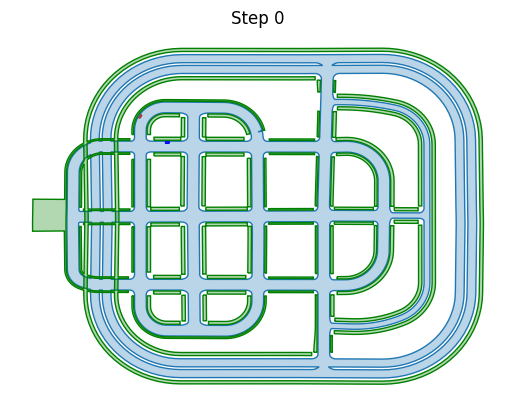

In [2]:
import shapely

import shapely.plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ego = realization.get_ego()
adv = realization.get_object(1)
network = realization.network

multiplier = 2

drivable_region = network.drivableRegion
walkable_region = network.walkableRegion
def update(frame):
    ax.clear()
    frame = frame*multiplier
    
    ego_state = ego.get_state(frame)
    
    
    ego_region = MeshVolumeRegion(mesh=ego.mesh, dimensions=ego.dimensions, rotation=ego_state.orientation, position=ego_state.position)
    
    
    shapely.plotting.plot_polygon(ego_region.boundingPolygon.polygons, ax=ax, add_points=False, color='red')    
    shapely.plotting.plot_polygon(drivable_region.polygons, ax=ax, add_points=False)
    shapely.plotting.plot_polygon(walkable_region.polygons, ax=ax, add_points=False, color='green')
    
    for adv in realization.objects_non_ego:
        
        adv_state = adv.get_state(frame)        
        adv_region = MeshVolumeRegion(mesh=adv.mesh, dimensions=adv.dimensions, rotation=adv_state.orientation, position=adv_state.position)
        if adv.object_type == 'Pedestrian':
            color = 'purple'
        else:
            color = 'blue'
        
        shapely.plotting.plot_polygon(adv_region.boundingPolygon.polygons, ax=ax, add_points=False, color=color)
    plt.title(f"Step {frame}")
    ax.set_xticks([])
    ax.set_yticks([])


    
    #delete frame around plot
    for spine in ax.spines.values():
        spine.set_visible(False)
    


    
fig, ax = plt.subplots()

anim = animation.FuncAnimation(fig, update, frames=MAX_STEPS//multiplier, repeat=False)
#save_path = "scenario.gif"
#anim.save(save_path, fps=20)





    

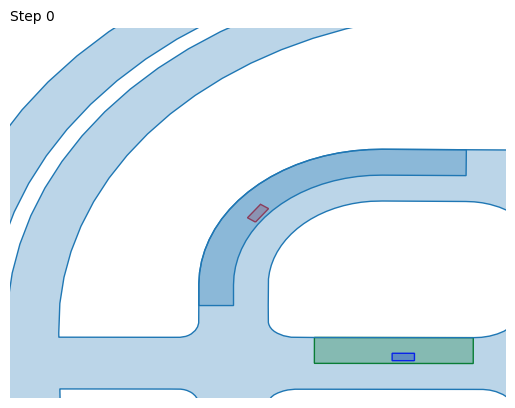

In [2]:
import shapely

import shapely.plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation

ego = realization.get_ego()
adv = realization.get_object(1)
network = realization.network

multiplier = 2

drivable_region = network.drivableRegion
walkable_region = network.walkableRegion
def intersection_update(frame):
    ax.clear()
    frame = frame*multiplier
    
    ego_state = ego.get_state(frame)
    
    
    ego_region = MeshVolumeRegion(mesh=ego.mesh, dimensions=ego.dimensions, rotation=ego_state.orientation, position=ego_state.position)
    
    ego_lane = network.laneGroupAt(ego_state.position).polygons

    
    
    shapely.plotting.plot_polygon(ego_region.boundingPolygon.polygons, ax=ax, add_points=False, color='red')    
    shapely.plotting.plot_polygon(ego_lane, ax=ax, add_points=False)
    
    for adv in realization.objects_non_ego:
        
        adv_state = adv.get_state(frame)        
        adv_region = MeshVolumeRegion(mesh=adv.mesh, dimensions=adv.dimensions, rotation=adv_state.orientation, position=adv_state.position)
        adv_lane = network.laneGroupAt(adv_state.position).polygons
        if adv.object_type == 'Pedestrian':
            color = 'purple'
        else:
            color = 'blue'
        shapely.plotting.plot_polygon(adv_lane, ax=ax, add_points=False, color='green')
        shapely.plotting.plot_polygon(adv_region.boundingPolygon.polygons, ax=ax, add_points=False, color=color)
    
    shapely.plotting.plot_polygon(drivable_region.polygons, ax=ax, add_points=False)
    intersection_region = network.intersectionAt(ego_state.position)
    if intersection_region is not None:
        roads = intersection_region.roads
        for road in roads:
            shapely.plotting.plot_polygon(road.polygons, ax=ax, add_points=False, color='orange')
    ax.set_xticks([])
    ax.set_yticks([])


    
    #delete frame around plot
    for spine in ax.spines.values():
        spine.set_visible(False)
    #center plot around ego
    ax.set_xlim(ego_state.position[0]-50, ego_state.position[0]+50)
    ax.set_ylim(ego_state.position[1]-50, ego_state.position[1]+50)
    ax.set_title(f"Step {frame}", loc='left', fontsize=10, color='black')


    
fig, ax = plt.subplots()

anim = animation.FuncAnimation(fig, intersection_update, frames=MAX_STEPS//multiplier, repeat=False)
#save_path = "scenario.gif"
#anim.save(save_path, fps=20)





    

In [ ]:
from IPython.display import HTML
from matplotlib import rc
rc('animation', html='jshtml')
HTML(anim.to_jshtml())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


: 

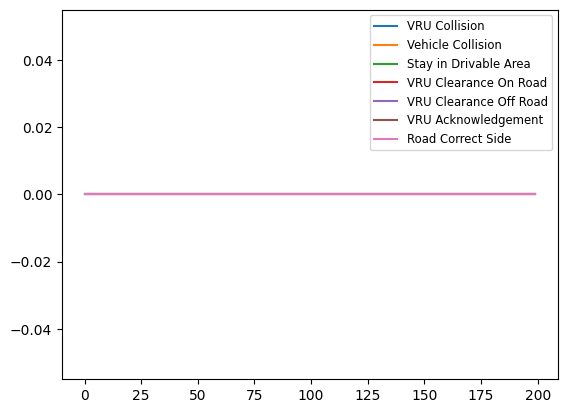

In [4]:
from rulebook_benchmark.rule_functions import default_rules
import matplotlib.pyplot as plt

histories = []
for rule in default_rules:
    violation, history = rule(realization)
    
    histories.append(history)
    plt.plot(history)
plt.legend([rule.name for rule in default_rules], loc='upper right', fontsize='small')
#make legend smaller
plt.savefig("violation_histories.png")
plt.show()
